##  Lab - Anomaly Detection Basics

_Anomaly detection (also outlier detection) is the identification of items, events or observations which do not conform to an expected pattern or other items in a dataset - wikipedia.com_

Most of the times outliers are a byproduct of clustering algorithms. 
Clustering algorithms are not designed to detect outliers but rather to form clusters of data.
The accuracy of how well outliers are detected depends on how well clustering algorithms can capture the structures.
Sometimes a set of similar abnormal objects are grouped as a cluster. 

### Outliers

Outliers are the samples that are exceptionally far from the mainstream of data. 
There is no rigid mathematical definition of what constitutes an outlier; 
determining whether or not an observation is an outlier is ultimately a subjective exercise. 
Some generally accepted definitions include:
- (Hawkins, 1980): an outlier is an observation that deviates so much from other observations as to arouse suspicion that it was generated by a different mechanism. 
- (Barnett and Lewis, 1994): an outlying observation is one that appears to deviate markedly from other members of the sample in which it occurs.
-  (Johnson, 1992): an outlier is an observation in a data set which appears to be inconsistent with the remainder of that set of data.

There are various methods of outlier detection. Some are graphical such as normal probability plots. 
Others are model-based.

There are two main types of outliers, *representative* and *nonrepresentative*.
A representative outlier is one that is a correct or valid observation that "cannot be regarded as unique". 
While this type of outlier is considered an extreme value, it should be retained, 
with special treatment during the analysis stages.
A nonrepresentative outlier is one that is an "incorrect observation" 
(i.e., due to an error in data entry, coding, or measurement) 
or is considered unique because there are no other values like it in the population. 
Nonrepresentative outliers should be corrected or excluded from the analysis.

Predictive modeling techniques can be impacted as a result of presence of outliers.
Dealing with outliers in data analysis is one of the important challenges. 
Detecting outliers and understanding them can lead to interesting findings.
Outliers can impact accuracy of predictive models.
Detecting outliers and dealing with them is a critical step in data preparation for predictive modeling. 
The picture below shows how an outlier can impact the overall fit of a linear regression model.

![outlier.PNG MISSING](../images/outlier.PNG)

### Outlier Detection Models:

There are several approaches for detecting Outliers. Charu Aggarwal in his book [Outlier Analysis](http://www.charuaggarwal.net/outlierbook.pdf) classifies Outlier detection models in the following groups:

**Extreme Value Analysis:** This is the most basic form of outlier detection and only good for 1-dimension data. In these types of analysis, it is assumed that values which are too large or too small are outliers. Z-test and Student’s t-test are examples of these statistical methods. These are good heuristics for initial analysis of data but they don’t have much value in multivariate settings. They can be used as final steps for interpreting outputs of other outlier detection methods.

**Probabilistic and Statistical Models:** These models assume specific distributions for data. Then using expectation-maximization (EM) methods they estimate the parameters of the model. Finally, they calculate probability of membership of each data point to the calculated distribution. The points with low probability of membership are marked as outliers.

**Linear Models:** These methods model the data into lower dimensional sub-spaces with the use of linear correlations. Then the distance of each data point to a plane that fits the sub-space is calculated. This distance is used to find outliers. PCA (Principal Component Analysis) is an example of a linear model for anomaly detection.

**Proximity-based Models:** The idea with these methods is to model outliers as points which are isolated from rest of the observations. Cluster analysis, density based analysis and nearest neighborhood are the main approaches of this kind.

**Information Theoretic Models:** These methods are based on the fact that outliers increase the minimum code length required to describe a data set. 

**High-Dimensional Outlier Detection:** Specifc methods to handle high-dimensional, sparse data.

### Outliers in Univariate Data
As we noted above, extreme-value statistics can be used with univariate data.
The perspective on outliers is different for this approach than the general defintions we gave above. 
Let's consider the data set {1,2,2,3,50,97,98,98,99} to delve into different ways of viewing outliers. 
The values 1 and 99 could be considered extreme, since they are the max and min values. 
The average of this data set is 50, which occurs in the set and could not be considered an extreme value. 
But even though 50 is the average, the other data values are grouped in two apparent clusters. 
So an extreme-value approach could give a very different view of outliers than a probability or density approach.

#### Extreme value outlier detection with Boxplot
A common graphical approach in R for extreme-value is a boxplot. 
The box represents the two middle quartiles and is called the inter-quartile range. 
The whiskers extend out from the box, but their lengths may vary depending on the parameter for range. 
If range is positive, the whiskers extend to the most extreme data point which is no more than range 
times the interquartile range from the box. A value of zero causes the whiskers to extend to the data extremes. 
The default is 1.5 times the interquartile range. 
Values outside the whiskers are outliers (in the sense of extreme values.)

In [1]:
# For some data, we'll generate a random normal distribution 
# with the default mean of 0 and standard deviation of 1
set.seed(3456)
x <- rnorm(100)
summary(x)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.98425 -0.70843 -0.03807 -0.02393  0.56524  2.95775 

In [2]:
# the boxplot function runs on boxplot.stats underneath the hood.
# The output is a list of several components, including $out which contains the outliers
# https://www.rdocumentation.org/packages/grDevices/versions/3.4.3/topics/boxplot.stats
# the coef parameter is the same as range in the boxplot function
boxplot.stats(x, coef = 1.5)$out

[1] 2.527974 2.957753

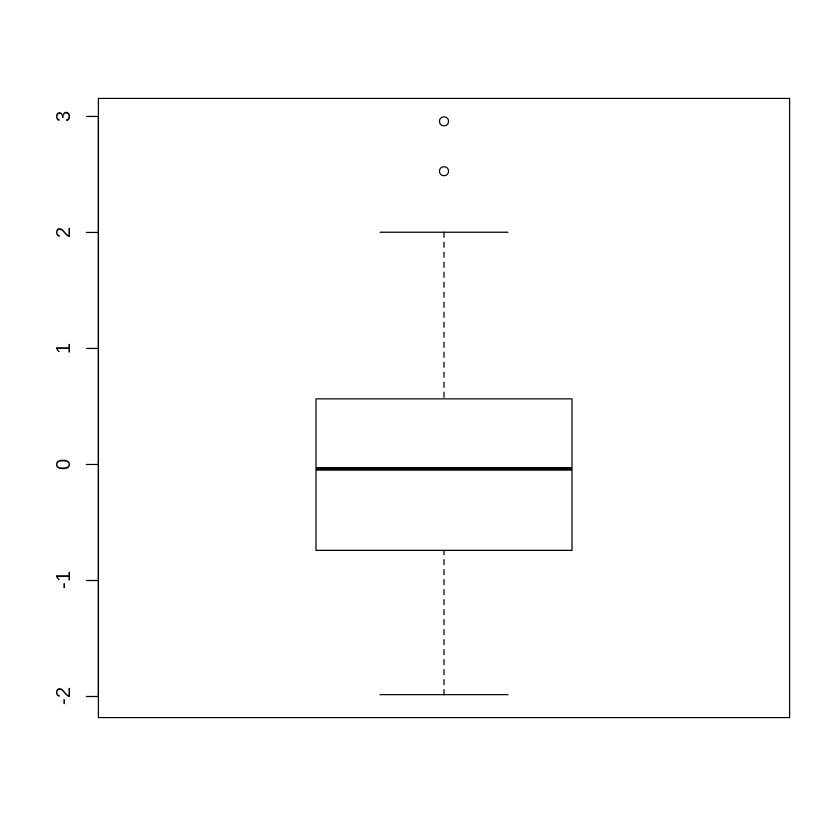

In [3]:
# Let's see what that looks like
# https://www.rdocumentation.org/packages/graphics/versions/3.4.3/topics/boxplot
# a range of 1.5 is the default, but we've made it explicit
boxplot(x, range = 1.5)

#### Univariate proximity outlier detection with K-means
We'll demonstrate how to use k-means clustering to find outliers that fit the more convential defintion, rather than the extreme-value definition. We'll use a very contrived example containing two obvious clusters and three outliers, making k and the number of outliers easy to choose. (Refer back to Module 3 for more realistic examples and a discussion about choosing k.) 

We will run K-means, extract the centers from the results, and find the distances between the centers and each point. The outliers will be the points with the max distances.

In [4]:
# some made up univariate data with two clusters and contrived outliers
y= c(100,99,99,99,98,97,97,96,96,95,0,1,1,1,2,3,3,4,4,5,50, 80, 21)

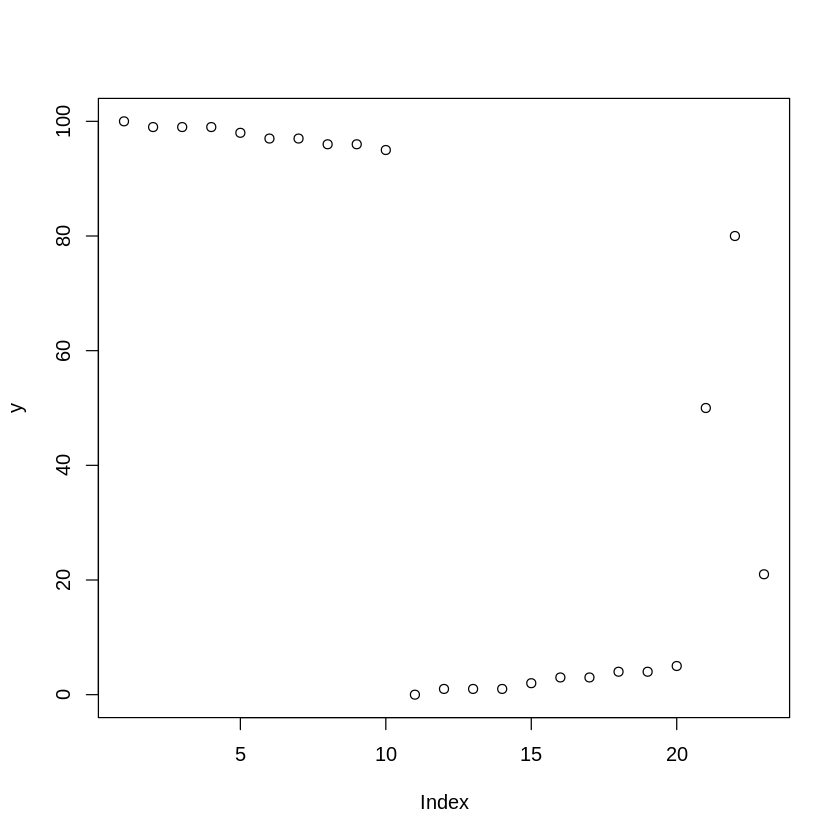

In [5]:
# visualize the data. Note the x axis is the index. Only the y axis has semantic value.
plot(y)

In [6]:
# run k-means with k=2
result<- kmeans(y,2)
centers <- result$centers[result$cluster, ] # "centers" is a data frame of 2 centers but the length the dataset 

distances <- sqrt((y - centers)^2) # find the distances between the centers and each point

outliers <- order(distances, decreasing=T)[1:3] # we are finding the indexes of the 3 points with the max distance

print(outliers) 

[1] 21 22 23


In [7]:
result

K-means clustering with 2 clusters of sizes 12, 11

Cluster means:
       [,1]
1  7.916667
2 96.000000

Clustering vector:
 [1] 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1

Within cluster sum of squares by cluster:
[1] 2270.917  306.000
 (between_SS / total_SS =  94.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [8]:
centers

2         2         2         2         2         2         2         2 
96.000000 96.000000 96.000000 96.000000 96.000000 96.000000 96.000000 96.000000 
        2         2         1         1         1         1         1         1 
96.000000 96.000000  7.916667  7.916667  7.916667  7.916667  7.916667  7.916667 
        1         1         1         1         1         2         1 
 7.916667  7.916667  7.916667  7.916667  7.916667 96.000000  7.916667

In [9]:
distances

2         2         2         2         2         2         2         2 
 4.000000  3.000000  3.000000  3.000000  2.000000  1.000000  1.000000  0.000000 
        2         2         1         1         1         1         1         1 
 0.000000  1.000000  7.916667  6.916667  6.916667  6.916667  5.916667  4.916667 
        1         1         1         1         1         2         1 
 4.916667  3.916667  3.916667  2.916667 42.083333 16.000000 13.083333

### Outliers in Bivariate and Multivariate Data

Although extreme value analysis is only suited for univariate data, multivariate data can be examined variable by variable.
So for instance, for two variable x and y, you could use boxplot.stats to find the outliers for each variable. 
You could then look for the intersection of the two sets of outliers or take the union. 

Similarly, using clustering with k-means to find the outliers that are the most different rather 
than the extreme values, you can simply alter the distance formula to take the distances over the row sums:

`distances <- sqrt(rowSums((dataset - centers)^2))`

R offers several packages and functions to enable us to use more sophisticated models. 
In the next lab we will look at two:
using Principal Component Analysis for Anomaly Detection and the Local Outlier Factor. 
There are many others!

